### Image Classification

In [1]:
# import libraries

import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading CIFAR10 dataset

(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
# converting y into a 1 dimentional array as y is currently a 2 dimentional array

y_train = y_train.reshape(-1)
y_train.shape

(50000,)

In [7]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ['airplane','automobile', 'bird','cat', 'deer', 'dog','frog','horse','sheep','truck']

In [9]:
# visulizing a sample image in the dataset'

def plot_image(x,y,index):
    plt.figure(figsize=(1,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

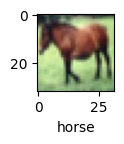

In [10]:
plot_image(x_train,y_train,7)

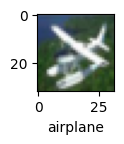

In [11]:
plot_image(x_train,y_train,2345)

In [12]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
# normalization

x_train = x_train/255
x_test = x_test/255

In [14]:
# building an artifitial neural network

ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')

])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(x_train,y_train,epochs=5)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.3054 - loss: 1.9320
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4200 - loss: 1.6448
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.4487 - loss: 1.5619
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.4721 - loss: 1.4971
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4923 - loss: 1.4374


In [15]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4613 - loss: 1.4967


[1.49907648563385, 0.4609000086784363]

In [16]:
# classification report

from sklearn.metrics import confusion_matrix,classification_report

y_pred = ann.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [17]:
y_pred[:5]

array([[0.26683846, 0.47516528, 0.6105671 , 0.87194586, 0.42724687,
        0.7406216 , 0.6610832 , 0.09782191, 0.71524125, 0.07598971],
       [0.7662076 , 0.95553213, 0.1785952 , 0.17919599, 0.19179189,
        0.05265482, 0.02746613, 0.08493252, 0.9918451 , 0.94335115],
       [0.930645  , 0.90894806, 0.21803051, 0.13714966, 0.29834333,
        0.11376813, 0.00562056, 0.28797132, 0.99389   , 0.77038586],
       [0.7988565 , 0.61179495, 0.5082804 , 0.3402796 , 0.6512436 ,
        0.19675285, 0.01427493, 0.5755569 , 0.9705132 , 0.26252592],
       [0.14474759, 0.07358767, 0.7807388 , 0.637039  , 0.9689647 ,
        0.6927978 , 0.74073017, 0.63043773, 0.29513863, 0.0276059 ]],
      dtype=float32)

In [18]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 8, 8, 8, 4]

In [19]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.72      0.32      0.44      1000
           1       0.65      0.57      0.61      1000
           2       0.46      0.18      0.26      1000
           3       0.36      0.27      0.31      1000
           4       0.37      0.54      0.44      1000
           5       0.41      0.35      0.38      1000
           6       0.59      0.41      0.49      1000
           7       0.40      0.72      0.51      1000
           8       0.40      0.81      0.54      1000
           9       0.64      0.43      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



#### Using CNN to improve the performance of the model

In [20]:
# building a convolution neural network

cnn = models.Sequential([
    # cnn layer
    layers.Conv2D(filters = 32 , kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64,kernel_size=(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') #softmax will normalize the probability

])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.fit(x_train,y_train,epochs=5)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.3778 - loss: 1.7156
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5976 - loss: 1.1459
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 0.6546 - loss: 0.9925
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.6849 - loss: 0.8991
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7126 - loss: 0.8270


In [21]:

cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6956 - loss: 0.8987


[0.9008312225341797, 0.6937000155448914]

In [22]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [23]:

y_pred[:5]

array([[3.60524911e-03, 1.00632594e-03, 1.69303305e-02, 8.21833372e-01,
        1.17229193e-03, 9.36698541e-02, 4.70669419e-02, 8.82333028e-04,
        1.25846965e-02, 1.24858029e-03],
       [5.23076095e-02, 3.02329838e-01, 2.36109263e-05, 1.47841422e-06,
        4.14988989e-07, 4.07988239e-07, 8.44312922e-08, 6.82773234e-08,
        6.40049398e-01, 5.28711965e-03],
       [2.99549967e-01, 1.18998781e-01, 1.17342742e-02, 4.87263920e-03,
        9.17900994e-04, 8.41656467e-04, 1.15182913e-04, 1.68948795e-03,
        5.20324051e-01, 4.09560464e-02],
       [5.76572359e-01, 1.26744822e-01, 1.69674829e-02, 6.90415967e-03,
        7.32181594e-03, 2.81620887e-04, 4.74878470e-04, 1.91088975e-03,
        2.62150437e-01, 6.71536836e-04],
       [1.80271172e-06, 1.59522569e-05, 3.31399143e-02, 6.54043779e-02,
        1.90486193e-01, 4.32276307e-03, 7.06252396e-01, 7.04285630e-05,
        2.87776580e-04, 1.84028995e-05]], dtype=float32)

In [24]:

y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 8, 8, 0, 6]

In [25]:

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71      1000
           1       0.78      0.83      0.81      1000
           2       0.62      0.47      0.54      1000
           3       0.53      0.50      0.51      1000
           4       0.56      0.74      0.64      1000
           5       0.59      0.65      0.62      1000
           6       0.74      0.81      0.78      1000
           7       0.83      0.67      0.74      1000
           8       0.76      0.82      0.79      1000
           9       0.76      0.80      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [26]:
cm = confusion_matrix(y_test,y_pred_classes)
cm

array([[628,  31,  81,  36,  30,  10,  11,   8, 120,  45],
       [  9, 835,  10,   8,   6,   4,   9,   1,  22,  96],
       [ 39,  10, 472,  52, 167, 113,  93,  21,  20,  13],
       [  8,  19,  45, 498, 118, 181,  68,  22,  24,  17],
       [ 15,   9,  38,  58, 744,  27,  57,  28,  19,   5],
       [  9,   3,  24, 158,  66, 649,  25,  40,  13,  13],
       [  1,   8,  35,  55,  53,  22, 813,   2,   5,   6],
       [ 12,   8,  35,  43, 117,  75,  11, 672,   6,  21],
       [ 40,  50,  14,  13,   6,   9,   5,   8, 824,  31],
       [ 12,  92,   5,  20,  11,   9,   6,  11,  32, 802]], dtype=int64)

Text(45.722222222222214, 0.5, 'Truth')

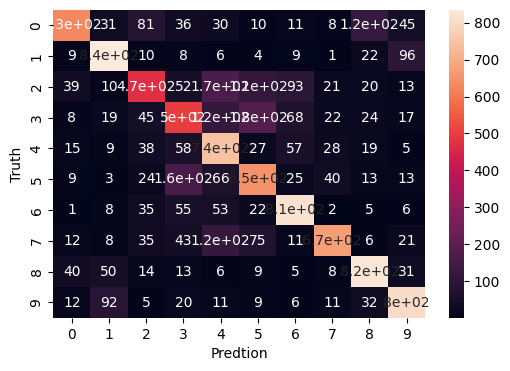

In [27]:

import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel('Predtion')
plt.ylabel('Truth')

In [28]:

y_test = y_test.reshape(-1)

In [29]:

y_test[0]

3

In [30]:

y_pred_classes[0]

3